In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
train_data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [ ]:
test_data  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
test_data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


# EDA

In [ ]:
# Get the basic information about the train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

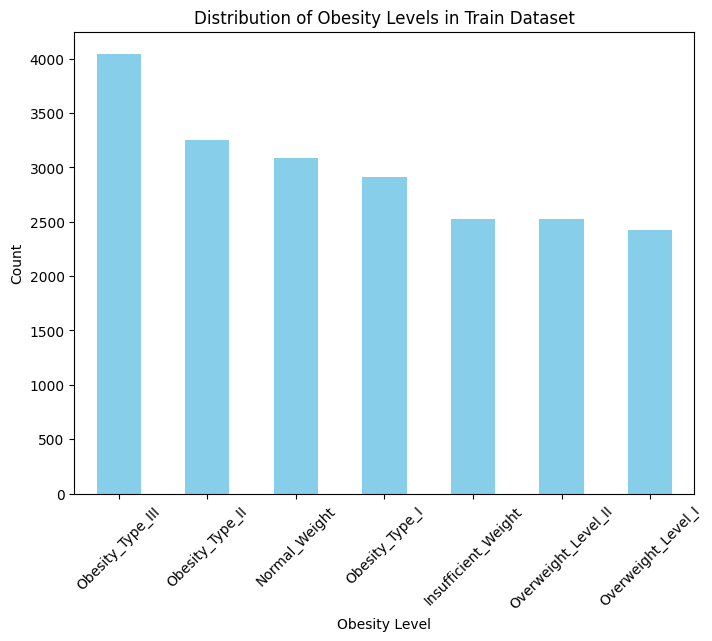

In [ ]:
# Visualize the distribution of the target variable in train dataset
plt.figure(figsize=(8, 6))
train_data['NObeyesdad'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Obesity Levels in Train Dataset')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

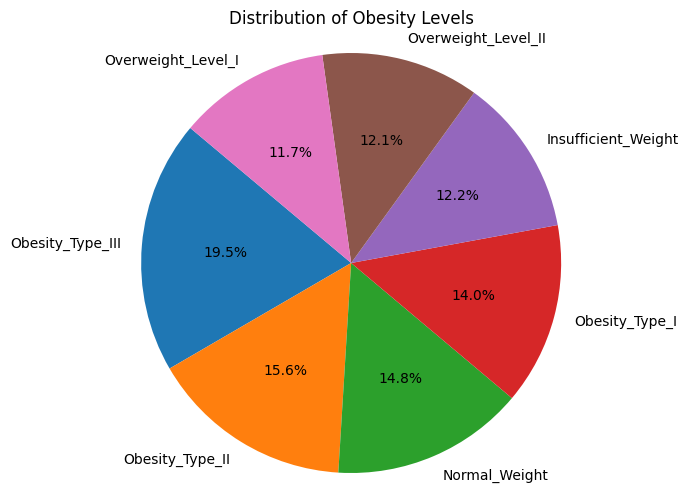

In [ ]:
# Count the occurrences of each category in the 'NObeyesdad' column
obesity_counts = train_data['NObeyesdad'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(obesity_counts, labels=obesity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Obesity Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Check for missing values in train dataset
missing_values_train = train_data.isnull().sum()
print("Missing values in train dataset:\n", missing_values_train)

# Check for missing values in test dataset
missing_values_test = test_data.isnull().sum()
print("Missing values in test dataset:\n", missing_values_test)


Missing values in train dataset:
 id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Missing values in test dataset:
 id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                

In [ ]:
# Separating numerical and categorical columns in the train dataset
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

print("Numerical columns:")
print(numerical_columns)

print("\nCategorical columns:")
print(categorical_columns)


Numerical columns:
Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

Categorical columns:
Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [ ]:
# Remove 'id' column from numerical columns list -  for the plots
numerical_columns = numerical_columns.drop('id')

Summary statistics for numerical columns:
                Age        Height        Weight          FCVC           NCP  \
count  20758.000000  20758.000000  20758.000000  20758.000000  20758.000000   
mean      23.841804      1.700245     87.887768      2.445908      2.761332   
std        5.688072      0.087312     26.379443      0.533218      0.705375   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.631856     66.000000      2.000000      3.000000   
50%       22.815416      1.700000     84.064875      2.393837      3.000000   
75%       26.000000      1.762887    111.600553      3.000000      3.000000   
max       61.000000      1.975663    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  
mean       2.029418      0.981747      0.616756  
std        0.608467      0.838302      0.602113  
min        1.000000      0.000000      0.00000

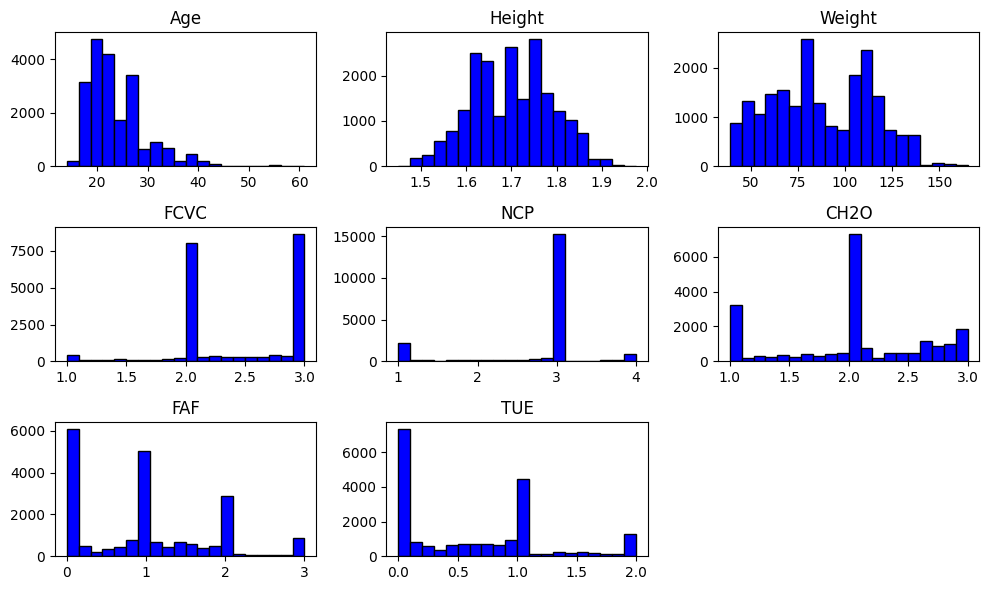

In [ ]:
# Summary statistics for numerical columns
numerical_summary = train_data[numerical_columns].describe()
print("Summary statistics for numerical columns:")
print(numerical_summary)

# Distribution plots for numerical columns
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    plt.hist(train_data[col], bins=20, color='blue', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()

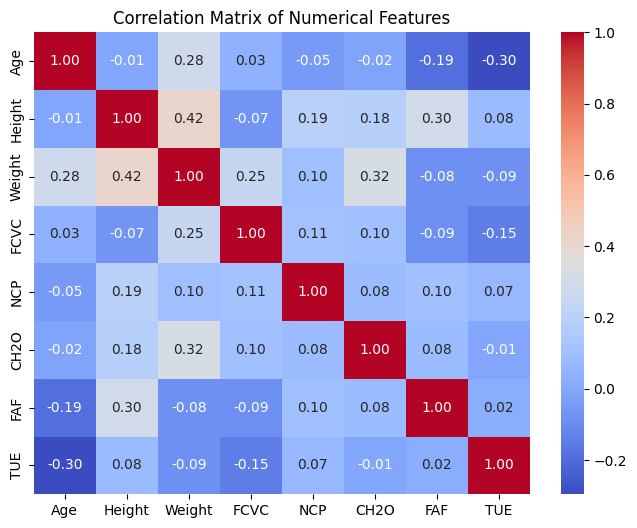

In [ ]:
# Correlation matrix for numarical values
correlation_matrix = train_data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

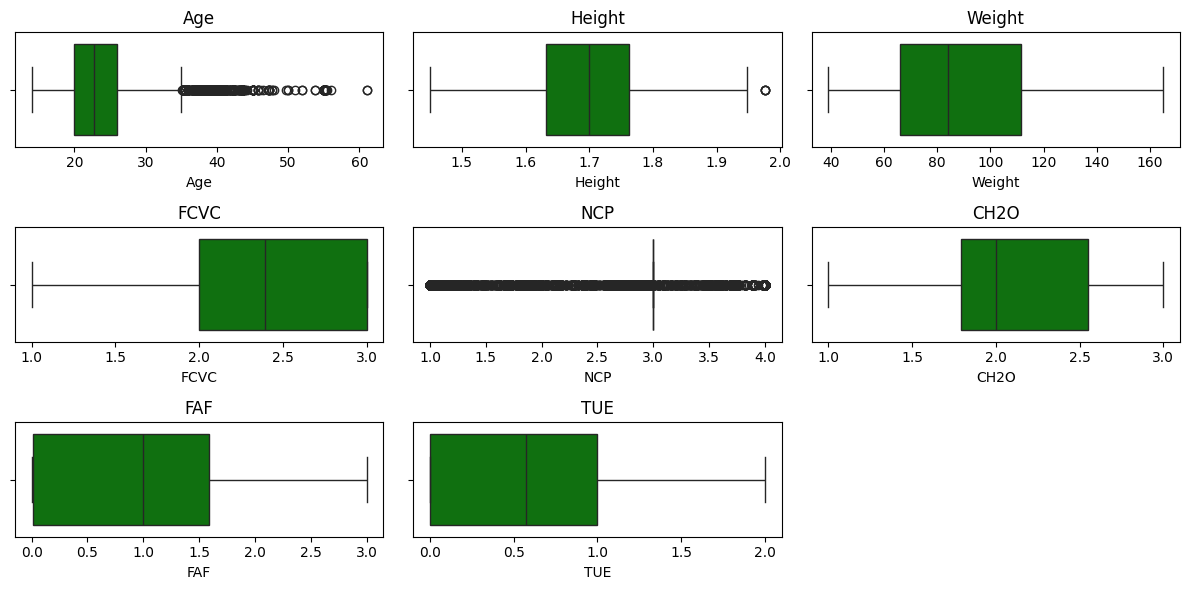

In [ ]:
# Draw box plots for all numerical features
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=train_data[col], color='green')
    plt.title(col)
plt.tight_layout()
plt.show()

<ipython-input-67-22ec673a7a9a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col], color='blue', kde=True)
<ipython-input-67-22ec673a7a9a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col], color='blue', kde=True)
<ipython-input-67-22ec673a7a9a>:5: UserWarning: 

`d

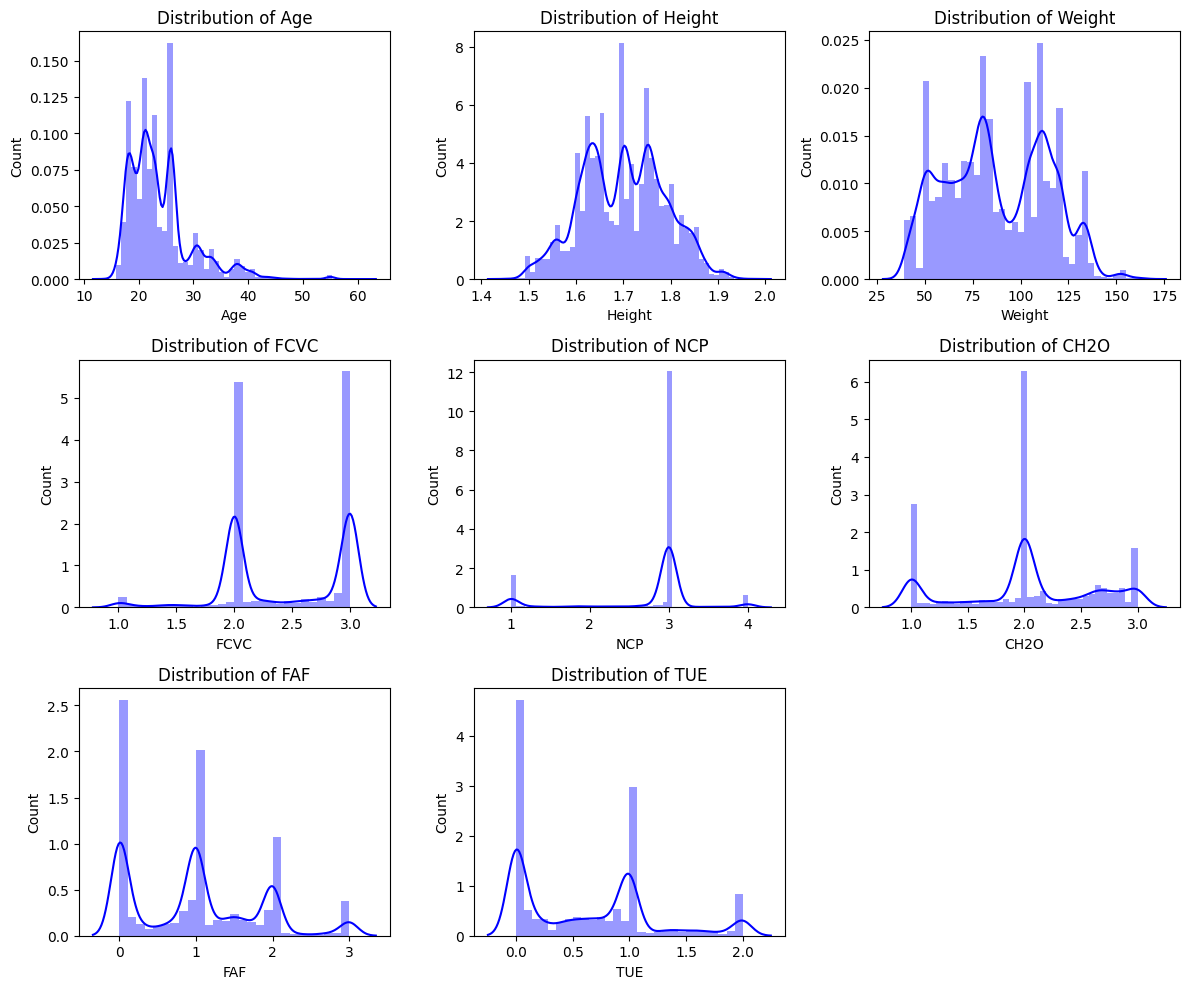

In [ ]:
# Distribution plots for numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.distplot(train_data[col], color='blue', kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


<ipython-input-61-24c63046ed43>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data[col], palette='Set2')
<ipython-input-61-24c63046ed43>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data[col], palette='Set2')
<ipython-input-61-24c63046ed43>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data[col], palette='Set2')
<ipython-input-61-24c63046ed43>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

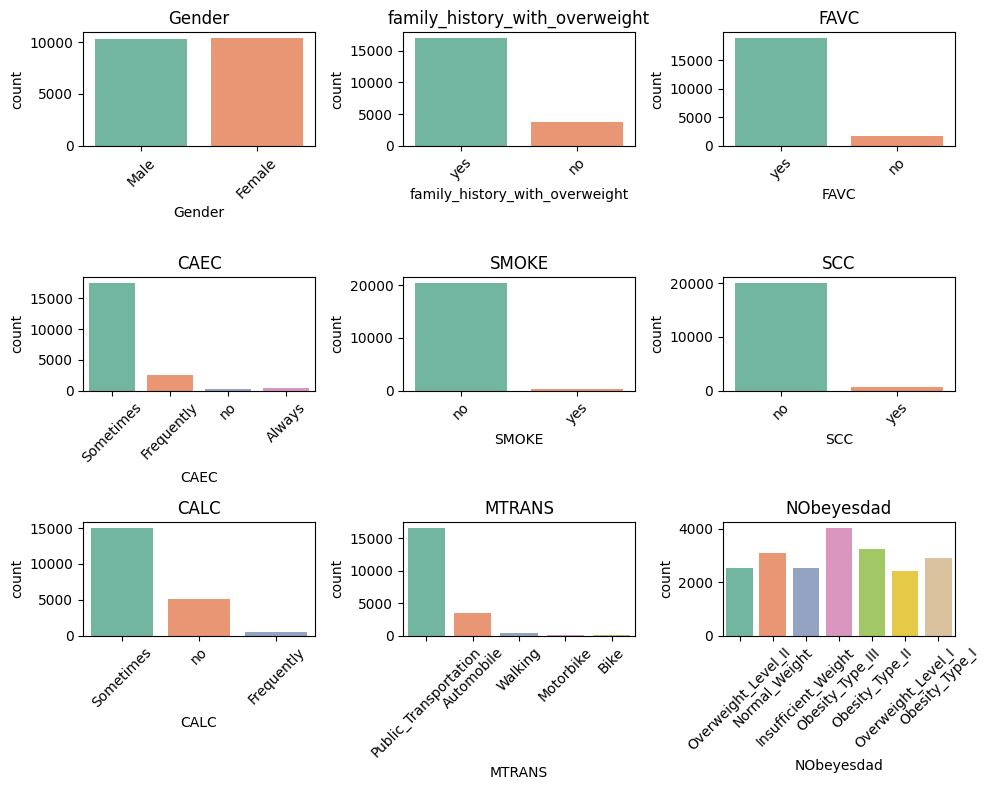

In [ ]:
# Distribution plot for categorical columns
plt.figure(figsize=(10, 8))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=train_data[col], palette='Set2')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Feature engineering

In [ ]:
# Separate features and target variable
train_data_features = train_data.drop(columns=["id", "NObeyesdad"])
train_data_target = train_data["NObeyesdad"]

test_datas = test_data.drop(columns=["id"])

In [ ]:
# Perform One-Hot Encoding for train data -- convert categorical vals to numeric
encoded_train_data = pd.get_dummies(train_data_features)
print("Encoded Dataset Columns:", encoded_train_data.columns, len(encoded_train_data.columns))

# Encode categorical target variable
label_encoder = LabelEncoder()
encoded_train_target = label_encoder.fit_transform(train_data_target)

#do the same for test data
encoded_test_data = pd.get_dummies(test_datas)
print("Encoded Dataset Columns:", encoded_test_data.columns, len(encoded_test_data.columns))

Encoded Dataset Columns: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object') 30
Encoded Dataset Columns: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Au

We can use BMI instead of keeping height and weight

In [ ]:
# Calculate BMI for training data
encoded_train_data['BMI'] = encoded_train_data['Weight'] / ((encoded_train_data['Height']) ** 2)
encoded_train_data.drop(['Weight', 'Height'], axis=1, inplace=True)

# Calculate BMI for test data
encoded_test_data['BMI'] = encoded_test_data['Weight'] / ((encoded_test_data['Height']) ** 2)
encoded_test_data.drop(['Weight', 'Height'], axis=1, inplace=True)

print("Updated Training Data:")
print(encoded_train_data.columns, len(encoded_train_data.columns))

print("\nUpdated Test Data:")
print(encoded_test_data.columns,len(encoded_test_data.columns))

Updated Training Data:
Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'BMI'],
      dtype='object') 29

Updated Test Data:
Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 

It has some missing values on encoded_test_data. so apply missing values as 0 on that, to be same as train data

In [ ]:
# Align the columns in the test dataset with those in the training dataset
missing_cols = set(encoded_train_data.columns) - set(encoded_test_data.columns)
for col in missing_cols:
    encoded_test_data[col] = 0

# Ensure the order of columns is the same
encoded_test_data = encoded_test_data[encoded_train_data.columns]

In [ ]:
# Check the column count of the encoded training dataset
print("Column Count of Encoded Training Dataset:",encoded_train_data.columns, len(encoded_train_data.columns))

# Check the column count of the encoded test dataset
print("Column Count of Encoded Test Dataset:",encoded_test_data.columns, len(encoded_test_data.columns))


Column Count of Encoded Training Dataset: Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'BMI'],
      dtype='object') 29
Column Count of Encoded Test Dataset: Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 

In [ ]:
# Ensure the order of columns is the same
encoded_test_data = encoded_test_data[encoded_train_data.columns]

# Split

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(encoded_train_data, encoded_train_target, test_size=0.2, random_state=42)

# Train and evaluate

In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.3 MB/s eta 0:00:00


In [ ]:
import xgboost
import catboost
import lightgbm

In [ ]:
# Define hyperparameters for each model to tune
param_grid_model_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_model_XGB = {
    'n_estimators': [100, 200, 300],
    'max_depth': range(3,10,2),
    'learning_rate': [0.1, 0.01, 0.001],
    'min_child_weight':range(1,6,2)
}

param_grid_model_CAT = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.01, 0.001]
}

param_grid_model_LGBM = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [ ]:
# Initialize models
model_RF = RandomForestClassifier(random_state=42)
model_XGB = xgboost.XGBClassifier()
model_CAT = catboost.CatBoostClassifier(verbose=0)
model_LGBM = lightgbm.LGBMClassifier()

In [ ]:
# Perform grid search cross-validation for model_RF
grid_search_RF = GridSearchCV(model_RF, param_grid_model_RF, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Perform grid search cross-validation for model_XGB
grid_search_XGB = GridSearchCV(model_XGB, param_grid_model_XGB, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_XGB.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'eval_metric': ['merror'],
                         'learning_rate': [0.1, 0.01, 0.3],
                         'max_depth': range(3, 10, 6),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators': [100, 200, 300], 'num_class': [7],
                         'objective': ['multi:softmax'], 'seed': [1],
                         'subsample': [1]},
             scoring='accuracy')

In [ ]:
# Perform grid search cross-validation for model_CAT
grid_search_CAT = GridSearchCV(model_CAT, param_grid_model_CAT, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_CAT.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7c5f8ac77850>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.1, 0.01, 0.001]},
             scoring='accuracy')

In [ ]:
# Perform grid search cross-validation for model_LGBM
grid_search_LGBM = GridSearchCV(model_LGBM, param_grid_model_LGBM, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_LGBM.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1810
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 29
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
random_search_RF = RandomizedSearchCV(model_RF, param_grid_model_RF, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_RF.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search_XGB = RandomizedSearchCV(model_XGB, param_grid_model_XGB, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_XGB.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001,
                                                          0.05],
                                        'max_depth': range(3, 10, 2),
                                        'min_child_weight': range(1, 6, 2),
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search_CAT = RandomizedSearchCV(model_CAT, param_grid_model_CAT, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_CAT.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7c5f8ac77850>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'depth': [4, 6, 8],
                                        'iterations': [100, 200, 300],
                                        'learning_rate': [0.1, 0.01, 0.001]},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search_LGBM = RandomizedSearchCV(model_LGBM, param_grid_model_LGBM, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_LGBM.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1810
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 29
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Get the best model
best_model_RF = grid_search_RF.best_estimator_
best_model_XGB = grid_search_XGB.best_estimator_
best_model_CAT = grid_search_CAT.best_estimator_
best_model_LGBM = grid_search_LGBM.best_estimator_

best_model_RF_random = random_search_RF.best_estimator_
best_model_XGB_random = random_search_XGB.best_estimator_
best_model_CAT_random = random_search_CAT.best_estimator_
best_model_LGBM_random = random_search_LGBM.best_estimator_

In [ ]:
# Evaluate the best models
best_models = {
    'Random Forest': best_model_RF,
    'XGBoost': best_model_XGB,
    'CatBoost': best_model_CAT,
    'LightGBM': best_model_LGBM,
    'Random Forest Random': best_model_RF_random,
    'XGBoost Random': best_model_XGB_random,
    'CatBoost Random': best_model_CAT_random,
    'LightGBM Random': best_model_LGBM_random
}

best_accuracy = 0
best_model_name = None

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:", accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name

print("Best Model:", best_model_name)
print("Best Model Accuracy:", best_accuracy)

Random Forest Accuracy: 0.876204238921002
XGBoost Accuracy: 0.8853564547206165
CatBoost Accuracy: 0.8846339113680154
LightGBM Accuracy: 0.8868015414258189
Random Forest Random Accuracy: 0.876204238921002
XGBoost Random Accuracy: 0.88752408477842
CatBoost Random Accuracy: 0.8846339113680154
LightGBM Random Accuracy: 0.8868015414258189
Best Model: XGBoost Random
Best Model Accuracy: 0.88752408477842


In [ ]:
#use the best model
best_model = best_models[best_model_name]
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Define the number of folds for cross-validation
n_folds = 5

# Initialize KFold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Evaluate models using k-fold cross-validation
for model_name, model in best_models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

for model_name, model in best_models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# # Generate Confusion Matrix
from sklearn.metrics import confusion_matrix

best_pred = best_model.predict(X_test)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, best_pred)
print(cf_matrix)

[[484  36   0   0   0   3   1]
 [ 26 558   1   0   0  35   6]
 [  2   3 455  18   2  18  45]
 [  0   0  18 631   2   0   6]
 [  0   0   1   1 801   1   0]
 [  1  41  13   0   0 361  68]
 [  0   9  33   9   0  68 395]]


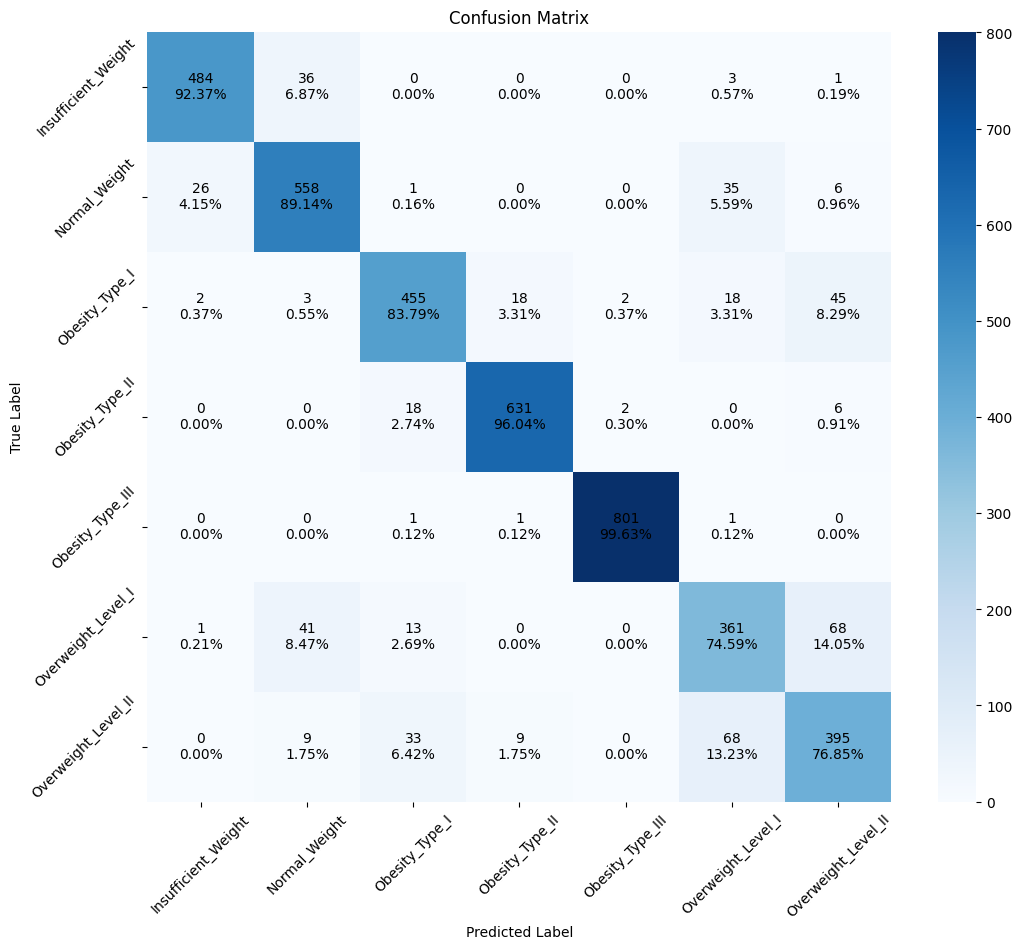

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix_heatmap(cf_matrix, label_encoder):
    class_labels = label_encoder.inverse_transform(np.arange(len(cf_matrix)))

    plt.figure(figsize=(12, 10))
    sns.heatmap(cf_matrix, annot=False, cmap='Blues', fmt='')

    # Add true positive and percentage
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            true_positive = cf_matrix[i, j]
            percentage = true_positive / np.sum(cf_matrix[i]) if np.sum(cf_matrix[i]) != 0 else 0

            text = f'{true_positive}\n' \
                   f'{percentage:.2%}'
            plt.text(j + 0.5, i + 0.5, text,
                     horizontalalignment='center', verticalalignment='center')

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.xticks(np.arange(len(class_labels)) + 0.5, labels=class_labels)
    plt.yticks(np.arange(len(class_labels)) + 0.5, labels=class_labels)
    plt.show()

# Plot confusion matrix as heatmap
plot_confusion_matrix_heatmap(cf_matrix, label_encoder)


# Make predictions

In [ ]:
encoded_test_data

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,...,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,BMI
0,26.899886,2.938616,3.000000,2.825629,0.855400,0.000000,0,1,0,1,...,0,0,1,0,0,0,0,1,0,35.315411
1,21.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1,0,0,1,...,0,0,1,0,0,0,0,1,0,25.781250
2,26.000000,3.000000,3.000000,2.621877,0.000000,0.250502,1,0,0,1,...,0,0,1,0,0,0,0,1,0,41.324115
3,20.979254,2.000000,2.977909,2.786417,0.094851,0.000000,0,1,0,1,...,0,0,1,0,0,0,0,1,0,42.976937
4,26.000000,3.000000,3.000000,2.653531,0.000000,0.741069,1,0,0,1,...,0,0,1,0,0,0,0,1,0,39.584143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,23.327836,2.813234,3.000000,1.000000,0.807076,0.778632,0,1,0,1,...,0,0,1,0,0,0,0,1,0,26.333478
13836,29.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1,0,1,0,...,0,0,1,0,0,0,0,1,0,24.524346
13837,22.935612,3.000000,2.273740,2.000000,1.949840,1.000000,1,0,1,0,...,0,0,1,0,0,0,0,1,0,17.652091
13838,21.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0,1,0,1,...,0,0,0,1,0,0,0,1,0,20.195092


In [ ]:
# Make predictions using the best model
test_predictions = best_model.predict(encoded_test_data)

In [ ]:
# Create a DataFrame with 'id' (index of test_data_encoded) and predicted values
submission_df = pd.DataFrame({'id': test_data.id, 'NObeyesdad': test_predictions.ravel()})

# Map encoded labels back to original class labels
submission_df['NObeyesdad'] = label_encoder.inverse_transform(submission_df['NObeyesdad'])

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [ ]:
#save the model - write binary
import pickle
filename = 'obesityriskapp.pkl'
pickle.dump(best_model,open(filename, 'wb'))